# Problem 2

In [51]:
import os
from scipy.cluster.vq import kmeans2 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import re
import pandas as pd
import math

In [2]:
file_path = '/Users/aryanbarik/Code/EE 541 Deep Learning/hw2/cluster.txt'


In [3]:
# Define a regex pattern for valid lines
pattern = "^[^#]"

# Function to check if a line is valid
def is_valid_line(line):
    return re.match(pattern, line) is not None

# Read the data from the file and filter out invalid lines
with open(file_path, 'r') as file:
    valid_lines = [line.strip() for line in file if is_valid_line(line)]
    
data = pd.DataFrame([line.split(' ') for line in valid_lines], columns=['x', 'y', 'class'])
data['x'] = pd.to_numeric(data['x'])
data['y'] = pd.to_numeric(data['y'])

df = data


### 2(a) Use K-Means clustering with 3-clusters to label each (x, y) pair as Head, Ear Right, or Ear - Left. You may use any standard NumPy or SciPy packages or experiment with your own implementation. Produce a scatter plot marking each (x, y) pair as either BLUE (class = Head), RED (class = Ear Left) or GREEN (class = Ear Right). Compare the K-means predicted labels to the true label and generate a confusion matrix showing the respective accuracies.

In [67]:
# Perform K-Means clustering with 3 clusters
num_clusters = 3
coordinates = df[['x', 'y']]
centroids, labels = kmeans2(coordinates, num_clusters)

# Map K-Means cluster labels to your classes (Head, Ear Right, Ear Left)
cluster_to_class_mapping = {
    0: 'Head',
    1: 'Ear_left',
    2: 'Ear_right'
}

num_labels = labels
print(num_labels)

# Assign predicted labels based on K-Means clustering
predicted_labels = [cluster_to_class_mapping[label] for label in labels]

print(predicted_labels)


[1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 0 1 1 1
 1 1 2 1 1 1 0 1 1 1 2 1 1 1 0 1 1 1 0 1 0 2 1 1 1 2 2 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 2 0 0 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 2 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 2 1 0 0 2 1 1 1 1 0 1 0 2 1 1 1 0 1 2 0 1 2 1 1 0
 1 1 2 1 1 1 2 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 2 1 0 1 1
 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 2 0 1 0 1 1 0 1 1
 2 2 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1
 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
['Ear

In [96]:
print(predicted_labels)

['Ear Right', 'Ear Right', 'Ear Left', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Left', 'Ear Right', 'Ear Right', 'Ear Left', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Left', 'Ear Right', 'Ear Right', 'Head', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Left', 'Head', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Left', 'Ear Right', 'Ear Right', 'Ear Right', 'Head', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Left', 'Ear Right', 'Ear Right', 'Ear Right', 'Head', 'Ear Right', 'Ear Left', 'Ear Right', 'Head', 'Ear Right', 'Head', 'Ear Left', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Left', 'Ear Left', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Head', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Right', 'Ear Left', 'Head'

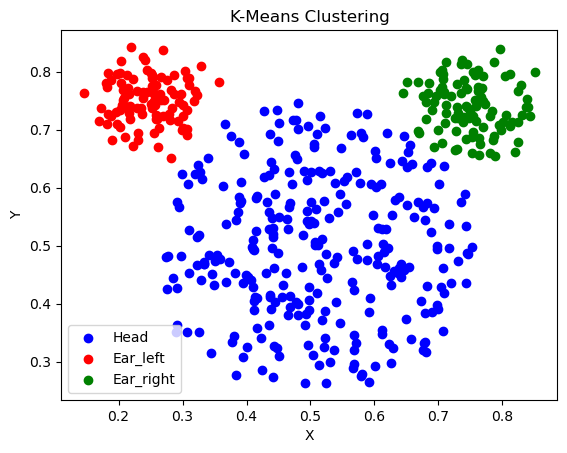

Confusion Matrix:
[[210  26  54]
 [  0 100   0]
 [  0   0 100]]


In [15]:
# Create a confusion matrix
confusion_mtx = confusion_matrix(df['class'], predicted_labels, labels=['Head', 'Ear_left', 'Ear_right'])

# Define colors for each class
colors = {'Head': 'blue', 'Ear_left': 'red', 'Ear_right': 'green'}

# Create a list of colors for each data point based on their true class
point_colors = [colors[label] for label in df['class']]

# Create separate arrays for each class
class_data = {}
# separating Head, Ear_left, Ear_right into 3 different dataframes by creating
# entries into class_data with the valyes of the x-y pairs
for class_label in ['Head', 'Ear_left', 'Ear_right']:
    class_indices = df[df['class'] == class_label].index
    class_data[class_label] = df.loc[class_indices]

# Set labels and title for the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')

# Plot the data points with different colors for different classes
for class_label, data_points in class_data.items():
    plt.scatter(data_points['x'], data_points['y'], c=colors[class_label], marker='o', label=class_label)

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_mtx)

### 2b

#### E-Step

In [77]:
# Get xn as a list
xn = coordinates.to_numpy()

# convert num_labels to one-hot encoding
# Original matrix
original_matrix = np.array(num_labels)

# Determine the number of unique values in the original matrix
num_classes = len(np.unique(original_matrix))

# Create a one-hot encoded matrix
one_hot_matrix = np.zeros((len(original_matrix), num_classes))
one_hot_matrix[np.arange(len(original_matrix)), original_matrix] = 1


# Set up gamma_k
gamma_head = one_hot_matrix[:, 0]
gamma_left = one_hot_matrix[:, 1]
gamma_right = one_hot_matrix[:, 2]

# Set up mu_k
mu_head, muk_left, muk_right = centroids[0], centroids[1], centroids[2]


In [52]:
# Calculate Gaussian PDF

# pair is a 1x2 matrix
# mu_k is a 1x2 matrix
# sigma_k 2x2 matrix bc 3 variables
def gauss_pdf(pair, mu_k, sigma_k):
    a = -0.5 * np.transpose(pair - mu_k)
    b = np.linalg.inv(sigma_k)
    c = (pair-mu_k)
    d = np.matmul(a, b)
    e = np.matmul(d, c)
    numerator = math.exp(e)
    
    denominator = math.sqrt((2*math.pi)*np.linalg.det(sigma_k))
    
    return (numerator / denominator)

In [ ]:
# Gaussian pdf for all xn
def gauss_pdf_all(mu_k, sigma_k):
    for pair in xn:
        gauss_pdf(pair, mu_k, sigma_k)

In [ ]:
# Update gamma_k
# Updates entire column for 1 class
def update_gamma_k(gamma_k, xn, mu_k, sigma_k, w_k):
    for i in range(len(xn)):
        numerator = w_k * gauss_pdf(xn[i], mu_k, sigma_k)
        
        denominator = 0.0
        
        for 

#### M-Step

In [63]:
# Calculate Covariance sigma_k
def calc_sigma_k(xn, mu_k, gamma_k):
    numerator_sum = 0.0
    denominator_sum = 0.0
    
    for i in range(len(xn)):
        denominator_sum += gamma_k[i]
        numerator_sum += gamma_k[i] * np.matmul(xn[i], np.transpose(xn[i]))
        
    return numerator_sum / denominator_sum

In [84]:
# Calculate Mixing weights
def calc_w_k(xn, gamma_k):
    sum = 0.0
    
    for i in range(len(xn)):
        sum += gamma_k[i]
    
    return sum / len(gamma_k)